In [1]:
# Install dependencies (only once in your environment)
# If already installed, you can skip this cell
!pip install pandas==1.5.3 numpy matplotlib seaborn scikit-learn sdv==0.12.0 rdt==0.6.4 ctgan==0.5.1


     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -- ------------------------------------- 0.3/5.2 MB ? eta -:--:--
     -

ERROR: Ignored the following yanked versions: 1.13.0
ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6,<3.9; 0.10.0.dev0 Requires-Python >=3.6,<3.9; 0.10.1 Requires-Python >=3.6,<3.9; 0.10.1.dev0 Requires-Python >=3.6,<3.9; 0.11.0 Requires-Python >=3.6,<3.9; 0.11.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0 Requires-Python >=3.6,<3.9; 0.12.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0.dev1 Requires-Python >=3.6,<3.9; 0.12.1 Requires-Python >=3.6,<3.9; 0.12.1.dev0 Requires-Python >=3.6,<3.9; 0.13.0 Requires-Python >=3.6,<3.10; 0.13.0.dev0 Requires-Python >=3.6,<3.10; 0.13.1 Requires-Python >=3.6,<3.10; 0.13.1.dev0 Requires-Python >=3.6,<3.10; 0.14.0 Requires-Python >=3.6,<3.10; 0.14.0.dev0 Requires-Python >=3.6,<3.10; 0.14.0.dev1 Requires-Python >=3.6,<3.10; 0.14.0.dev2 Requires-Python >=3.6,<3.10; 0.14.1 Requires-Python >=3.6,<3.10; 0.14.1.dev0 Requires-Python >=3.6,<3.10; 0.15.0 Requires-Python >=3.6,<3.10; 0.15.0.dev0 Requires-Python

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata


In [3]:
data = pd.read_csv("creditcard_small.csv")
print("Dataset Shape:", data.shape)
display(data.head())


Dataset Shape: (5000, 31)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0  0.496714 -0.138264  0.647689  1.523030 -0.234153 -0.234137  1.579213   
1   1.0 -0.600639 -0.291694 -0.601707  1.852278 -0.013497 -1.057711  0.822545   
2   2.0 -0.839218 -0.309212  0.331263  0.975545 -0.479174 -0.185659 -1.106335   
3   3.0 -0.808494 -0.501757  0.915402  0.328751 -0.529760  0.513267  0.097078   
4   4.0  0.060230  2.463242 -0.192361  0.301547 -0.034712 -1.168678  1.142823   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.767435 -0.469474  ...  1.465649 -0.225776  0.067528 -1.424748 -0.544383   
1 -1.220844  0.208864  ...  0.343618 -1.763040  0.324084 -0.385082 -0.676922   
2 -1.196207  0.812526  ...  0.087047 -0.299007  0.091761 -1.987569 -0.219672   
3  0.968645 -0.702053  ... -0.161286  0.404051  1.886186  0.174578  0.257550   
4  0.751933  0.791032  ... -1.062304  0.473592 -0.919424  1.549934 -0.783253   

        V26       V27       V28  Amount  Class  
0  0.110923 -1.150994  0.375698   11.61    0.0  
1  0.611676  1.031000  0.931280   47.67    0.0  
2  0.357113  1.477894 -0.518270   17.86    0.0  
3 -0.074446 -1.918771 -0.026514  104.51    0.0  
4 -0.322062  0.813517 -1.230864  111.88    0.0  

[5 rows x 31 columns]

In [4]:
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)
print("✅ Metadata created successfully")

✅ Metadata created successfully


In [6]:
synth = CTGANSynthesizer(metadata)


In [7]:
print("🚀 Training CTGAN model...")
synth.fit(data)
print("✅ Training complete!")


🚀 Training CTGAN model...
✅ Training complete!


In [8]:
synthetic_data = synth.sample(num_rows=1000)
print("Synthetic Data Shape:", synthetic_data.shape)
display(synthetic_data.head())

Synthetic Data Shape: (1000, 31)


Time        V1        V2        V3        V4        V5        V6  \
0   7486835.0 -0.010580 -2.082482  0.200009  1.149209  1.490695 -0.638739   
1   7252835.0 -0.338220  1.269264  1.711498  0.909996  0.438271  0.107613   
2   6892287.0  0.309694 -0.733217  1.623858  0.334237  1.053911 -0.183714   
3  15122484.0  1.089824  0.452736  1.254945 -0.243574 -0.094919  0.955713   
4   1373508.0  1.769140  0.592431  1.878363  0.585695  0.792154 -1.664730   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.746772 -0.131972  0.897442  ... -1.543006  0.653690 -1.297733  2.646418   
1 -0.626492 -1.591435  1.705220  ...  0.393186  0.941727 -0.732668  1.960461   
2 -1.444162 -1.205174 -1.977957  ... -0.904802 -0.751837  1.317591  0.033949   
3 -1.378114 -1.126510  0.116428  ...  1.580764  2.017136 -1.089609  0.325759   
4 -0.337823 -1.412159 -0.848674  ...  0.322191 -0.611554 -2.378912  3.341396   

        V25       V26       V27       V28  Amount  Class  
0  1.167558 -0.839682  1.839262  1.030692  182.10    1.0  
1  1.376977 -2.331522 -1.370768 -0.429871   98.51    0.0  
2  0.802756 -0.182611  0.250238 -2.044478    6.09    0.0  
3  1.569124  0.880840  0.843166  0.246303    0.00    0.0  
4  1.443647 -1.378130  0.772515  1.033787    0.38    1.0  

[5 rows x 31 columns]

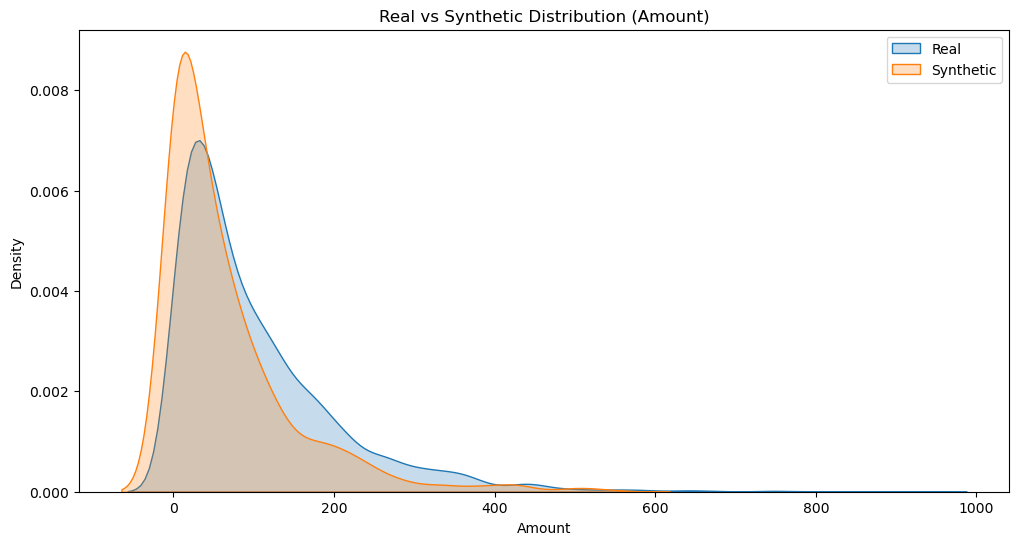

In [9]:
plt.figure(figsize=(12,6))
sns.kdeplot(data['Amount'], label='Real', fill=True)
sns.kdeplot(synthetic_data['Amount'], label='Synthetic', fill=True)
plt.legend()
plt.title("Real vs Synthetic Distribution (Amount)")
plt.show()


In [10]:
synth.save("ctgan_model.pkl")
synthetic_data.to_csv("synthetic_creditcard.csv", index=False)
print("✅ Model and synthetic dataset saved!")

✅ Model and synthetic dataset saved!
